# RQ 2.3: Lexical Analysis
In this research subquestion, we aim to analyze the lexical properties of the toxic words highlighted in the previous step. We will achieve this by performing the following steps:
1. Load the highlighted toxic words from the file.
2. Process the words with SpaCy to extract POS tags.
3. Calculate the distribution of POS tags.
4. Visualize the POS tag distribution with a pie chart using Matplotlib.
5. Extract lemmas (base forms) of the words and calculate their frequencies.
6. Filter the lemmas with more than 5 occurrences. This was done because there were more than 300 unique lemmas, and it is not feasible to visualize all, even the ones with a single occurrence.
7. Visualize the filtered lemma frequencies with a bar chart using Matplotlib.

In [1]:
import re

file_path = "highlighted_toxic_words.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

words = re.findall(r'\b\w+\b', content)

/Users/paulmark/Library/Mobile Documents/com~apple~CloudDocs/education/TU Delft - Master/q2/Natural Language Processing/RQ 2.1 - 2.2/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


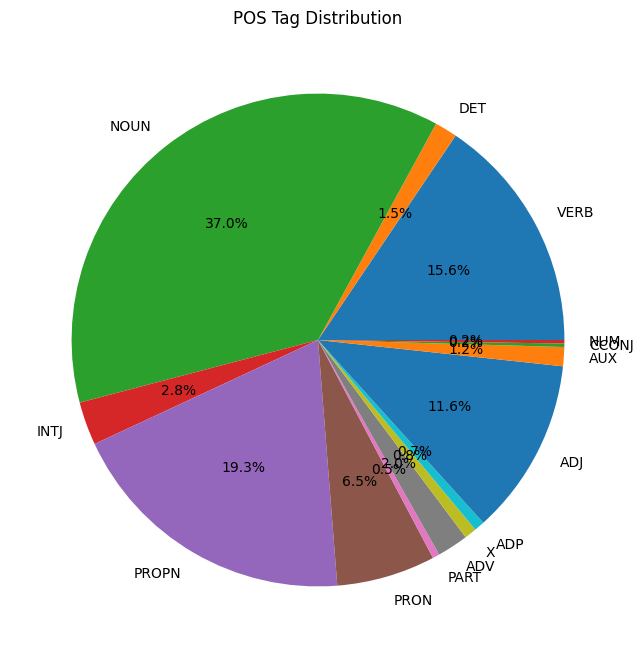

In [2]:
import spacy
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process words with SpaCy
doc = nlp(" ".join(words))

# POS tagging and extraction
pos_counts = Counter([token.pos_ for token in doc])

# Store words for all POS categories
pos_words = defaultdict(list)
for token in doc:
    pos_words[token.pos_].append(token.text)

# # Print words grouped by POS categories
# print("Words categorized by POS tags:")
# for pos, words in pos_words.items():
#     print(f"{pos}: {words}")

# Pie chart for POS distribution
plt.figure(figsize=(8, 8))
plt.pie(pos_counts.values(), labels=pos_counts.keys(), autopct='%1.1f%%')
plt.title("POS Tag Distribution")
plt.show()

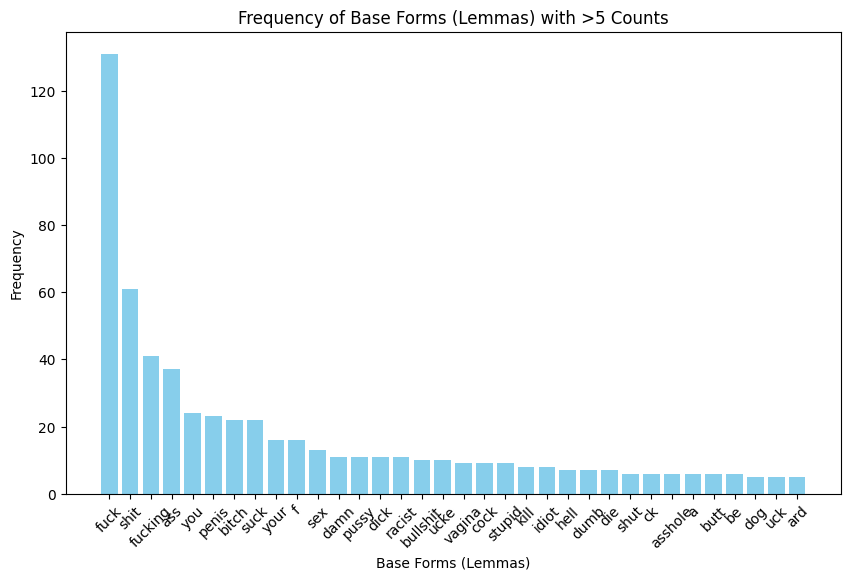

In [3]:
# Extract lemmas (base forms) and calculate frequencies
lemmas = [token.lemma_ for token in doc]
lemma_counts = Counter(lemmas)

# Filter lemmas with more than 5 occurrences
filtered_lemmas = {lemma: count for lemma, count in sorted(lemma_counts.items(), key=lambda x: x[1], reverse=True) if count >= 5}

# # Print filtered lemmas
# print("Base forms (lemmas) with more than 5 counts:")
# for lemma, count in filtered_lemmas.items():
#     print(f"{lemma}: {count}")

# Bar chart for filtered lemma frequencies
plt.figure(figsize=(10, 6))
plt.bar(filtered_lemmas.keys(), filtered_lemmas.values(), color='skyblue')
plt.xlabel("Base Forms (Lemmas)")
plt.ylabel("Frequency")
plt.title("Frequency of Base Forms (Lemmas) with >5 Counts")
plt.xticks(rotation=45)
plt.show()